**Exercise:** In the book, I claimed that Dijkstra's algorithm does not work unless it uses BFS.  Write a version of `shortest_path_dijkstra` that uses DFS and test it on a few examples to see what goes wrong.

In [1]:
import networkx as nx
import numpy as np
import math as m
import seaborn as sns
import timeit

# set node colors
colors = sns.color_palette('pastel', 8)
sns.set_palette(colors)

# from excercise3_1
def regular_edges(nodes, k):
    n = len(nodes)
    ed = [] # list placeholder for edges
    for i, u in enumerate(nodes):
        ne = m.floor(k/2) #floor function similar to adjacent_edges
        for j in range(i+1, i+ne+1):
            v = nodes[j % n]
            ed.append((u, v))
        if (k % 2) and i < n/2: # conditional to check if there are odd neighbors
            ed.append((u, int(i+n/2)))
    if len(ed) != 0.5*n*k: # conditional to check if the number of edges satisfy for a regular graph
        raise ValueError("No regular graph can be formed!")
    return ed

def make_graph(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(regular_edges(nodes, k))
    return G

def make_WS_graph(n, k, p):
    G = make_graph(n, k)
    nodes = set(G) #create list of iterable
    for u, v in G.edges():
        if np.random.random() < p:
            choices = nodes - {u} - set(G[u]) # removes the node and its neighbors as the possible new neighbor
            new_v = np.random.choice(list(choices))
            G.remove_edge(u,v)
            G.add_edge(u,new_v)
    return G

C:\Users\Carlo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
We first make a WS graph to test the algorithms.

C:\Users\Carlo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


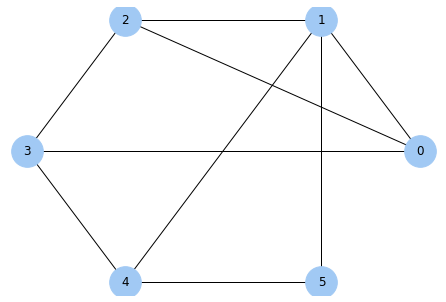

In [2]:
np.random.seed(11)
WS_graph = make_WS_graph(6, 3, 0.2)
nx.draw_circular(WS_graph,
                 node_color = 'C0',
                 node_size = 1000,
                 with_labels = True)

Here is the original version of `shortest_path_dijkstra` which uses BFS:

In [9]:
from collections import deque

def shortest_path_dijkstra(G, source):
    dist = {source: 0}
    queue = deque([source])
    while queue:
        node = queue.popleft()
        new_dist = dist[node] + 1

        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
        
        queue.extend(neighbors)
    return dist

To modify this so that it uses depth first search, we replace `queue.popleft()` with `queue.pop()`:

In [10]:
def shortest_path_dfs(G, start):
    dist = {start: 0}
    queue = deque([start])
    while queue:
        node = queue.pop()
        new_dist = dist[node] + 1

        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
        
        queue.extend(neighbors)
    return dist

In [12]:
ans1 = shortest_path_dijkstra(WS_graph, list(WS_graph)[0])
ans2 = shortest_path_dfs(WS_graph, list(WS_graph)[0])
print(ans1)
print(ans2)
ans1==ans2

{0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 2}
{0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3}


False